DATA PREPROCESSING FOR MACHINE LEARNING.WE ARE TAKING A ANOTHER PLACEMENT DATASET. IN THAT WE ARE REMOVING THE DUPLICATES VALUES,HANDLING MISSING VALUES,ENCODING CATEGORICAL DATA AND WE ARE DOING STANDARDIZATION AND NORMALIZATION OF THE DATASET.AFTER THAT WE ARE VISUALIZING THE DATASET BY HEATMAP AND HISTOGRAM.


In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as skl

In [2]:
#importing the dataset
dataset=pd.read_csv('/content/placement-dataset.csv')
print(dataset)

           city  cgpa     iq  placement
0      New York   6.8  123.0          1
1   Los Angeles   5.9  106.0          0
2       Chicago   NaN  121.0          0
3      New York   7.4  132.0          1
4   Los Angeles   5.8  142.0          0
..          ...   ...    ...        ...
95      Chicago   4.3  200.0          0
96     New York   4.4   42.0          0
97  Los Angeles   6.7  182.0          1
98      Chicago   6.3  103.0          1
99     New York   6.2  113.0          1

[100 rows x 4 columns]


In [3]:
dataset.head(10)

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0
5,Chicago,7.1,48.0,1
6,New York,5.7,NaN,0
7,Los Angeles,5.0,63.0,0
8,Chicago,6.1,156.0,0
9,New York,5.1,66.0,0


In [4]:
dataset.describe()

,cgpa,iq,placement
count,92.000000,96.000000,100.000000
mean,5.965217,117.916667,0.460000
std,1.164911,46.913508,0.500908
min,3.300000,1.000000,0.000000
25%,5.000000,90.000000,0.000000
50%,6.000000,122.000000,0.000000
75%,6.825000,146.750000,1.000000
max,8.500000,233.000000,1.000000


In [5]:
dataset.dtypes

,0
city,object
cgpa,float64
iq,float64
placement,int64


In [6]:
dataset.drop_duplicates()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0
...,...,...,...,...
95,Chicago,4.3,200.0,0
96,New York,4.4,42.0,0
97,Los Angeles,6.7,182.0,1
98,Chicago,6.3,103.0,1


In [7]:
dataset.isnull()

,city,cgpa,iq,placement
0,False,False,False,False
1,False,False,False,False
2,False,True,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
95,False,False,False,False
96,False,False,False,False
97,False,False,False,False
98,False,False,False,False


In [8]:
dataset.isnull().sum()

,0
city,0
cgpa,8
iq,4
placement,0


In [9]:
# Dropping categorical data rows with missing values
#dataset.dropna(how='any', subset=['cgpa', 'iq'], inplace=True)

In [10]:
# Splitting dataset into independent & dependent variable
X = dataset[['city', 'cgpa', 'iq']].values
y = dataset['placement'].values
print(X)
print(y)

[['New York' 6.8 123.0]
 ['Los Angeles' 5.9 106.0]
 ['Chicago' nan 121.0]
 ['New York' 7.4 132.0]
 ['Los Angeles' 5.8 142.0]
 ['Chicago' 7.1 48.0]
 ['New York' 5.7 nan]
 ['Los Angeles' 5.0 63.0]
 ['Chicago' 6.1 156.0]
 ['New York' 5.1 66.0]
 ['Los Angeles' 6.0 45.0]
 ['Chicago' 6.9 138.0]
 ['New York' 5.4 139.0]
 ['Los Angeles' 6.4 116.0]
 ['Chicago' nan 103.0]
 ['New York' 5.1 176.0]
 ['Los Angeles' 5.2 224.0]
 ['Chicago' 3.3 183.0]
 ['New York' 4.0 nan]
 ['Los Angeles' 5.2 132.0]
 ['Chicago' 6.6 120.0]
 ['New York' 7.1 151.0]
 ['Los Angeles' 4.9 120.0]
 ['Chicago' nan 87.0]
 ['New York' 4.7 121.0]
 ['Los Angeles' 5.0 91.0]
 ['Chicago' 7.0 199.0]
 ['New York' 6.0 124.0]
 ['Los Angeles' 5.2 90.0]
 ['Chicago' nan 1.0]
 ['New York' 7.6 128.0]
 ['Los Angeles' 3.9 109.0]
 ['Chicago' 7.0 139.0]
 ['New York' 6.0 149.0]
 ['Los Angeles' 4.8 163.0]
 ['Chicago' 6.8 90.0]
 ['New York' 5.7 140.0]
 ['Los Angeles' 8.1 149.0]
 ['Chicago' 6.5 160.0]
 ['New York' 4.6 146.0]
 ['Los Angeles' 4.9 134.0]
 

In [11]:
# import the SimpleImputer class from the sklearn library
from sklearn.impute import SimpleImputer
print(X[:, 1:3])

[[6.8 123.0]
 [5.9 106.0]
 [nan 121.0]
 [7.4 132.0]
 [5.8 142.0]
 [7.1 48.0]
 [5.7 nan]
 [5.0 63.0]
 [6.1 156.0]
 [5.1 66.0]
 [6.0 45.0]
 [6.9 138.0]
 [5.4 139.0]
 [6.4 116.0]
 [nan 103.0]
 [5.1 176.0]
 [5.2 224.0]
 [3.3 183.0]
 [4.0 nan]
 [5.2 132.0]
 [6.6 120.0]
 [7.1 151.0]
 [4.9 120.0]
 [nan 87.0]
 [4.7 121.0]
 [5.0 91.0]
 [7.0 199.0]
 [6.0 124.0]
 [5.2 90.0]
 [nan 1.0]
 [7.6 128.0]
 [3.9 109.0]
 [7.0 139.0]
 [6.0 149.0]
 [4.8 163.0]
 [6.8 90.0]
 [5.7 140.0]
 [8.1 149.0]
 [6.5 160.0]
 [4.6 146.0]
 [4.9 134.0]
 [5.4 114.0]
 [7.6 89.0]
 [nan 141.0]
 [7.5 61.0]
 [6.0 66.0]
 [5.3 114.0]
 [5.2 161.0]
 [6.6 138.0]
 [5.4 135.0]
 [3.5 233.0]
 [4.8 141.0]
 [nan 1.0]
 [8.3 168.0]
 [6.4 141.0]
 [7.8 114.0]
 [6.1 65.0]
 [6.5 130.0]
 [8.0 79.0]
 [4.8 112.0]
 [nan 1.0]
 [7.3 137.0]
 [6.0 102.0]
 [6.3 128.0]
 [7.0 64.0]
 [8.1 166.0]
 [6.9 96.0]
 [5.0 118.0]
 [4.0 75.0]
 [8.5 120.0]
 [6.3 127.0]
 [6.1 nan]
 [7.3 116.0]
 [4.9 61.0]
 [6.7 154.0]
 [4.8 169.0]
 [4.9 155.0]
 [7.3 50.0]
 [6.1 81.0]
 [na

In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
print(X[:, 1:3])

[[6.8 123.0]
 [5.9 106.0]
 [5.965217391304349 121.0]
 [7.4 132.0]
 [5.8 142.0]
 [7.1 48.0]
 [5.7 117.91666666666667]
 [5.0 63.0]
 [6.1 156.0]
 [5.1 66.0]
 [6.0 45.0]
 [6.9 138.0]
 [5.4 139.0]
 [6.4 116.0]
 [5.965217391304349 103.0]
 [5.1 176.0]
 [5.2 224.0]
 [3.3 183.0]
 [4.0 117.91666666666667]
 [5.2 132.0]
 [6.6 120.0]
 [7.1 151.0]
 [4.9 120.0]
 [5.965217391304349 87.0]
 [4.7 121.0]
 [5.0 91.0]
 [7.0 199.0]
 [6.0 124.0]
 [5.2 90.0]
 [5.965217391304349 1.0]
 [7.6 128.0]
 [3.9 109.0]
 [7.0 139.0]
 [6.0 149.0]
 [4.8 163.0]
 [6.8 90.0]
 [5.7 140.0]
 [8.1 149.0]
 [6.5 160.0]
 [4.6 146.0]
 [4.9 134.0]
 [5.4 114.0]
 [7.6 89.0]
 [5.965217391304349 141.0]
 [7.5 61.0]
 [6.0 66.0]
 [5.3 114.0]
 [5.2 161.0]
 [6.6 138.0]
 [5.4 135.0]
 [3.5 233.0]
 [4.8 141.0]
 [5.965217391304349 1.0]
 [8.3 168.0]
 [6.4 141.0]
 [7.8 114.0]
 [6.1 65.0]
 [6.5 130.0]
 [8.0 79.0]
 [4.8 112.0]
 [5.965217391304349 1.0]
 [7.3 137.0]
 [6.0 102.0]
 [6.3 128.0]
 [7.0 64.0]
 [8.1 166.0]
 [6.9 96.0]
 [5.0 118.0]
 [4.0 75.0]
 

In [13]:
# Handling Categorical Data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('enconder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 1.0 6.8 123.0]
 [0.0 1.0 0.0 5.9 106.0]
 [1.0 0.0 0.0 5.965217391304349 121.0]
 [0.0 0.0 1.0 7.4 132.0]
 [0.0 1.0 0.0 5.8 142.0]
 [1.0 0.0 0.0 7.1 48.0]
 [0.0 0.0 1.0 5.7 117.91666666666667]
 [0.0 1.0 0.0 5.0 63.0]
 [1.0 0.0 0.0 6.1 156.0]
 [0.0 0.0 1.0 5.1 66.0]
 [0.0 1.0 0.0 6.0 45.0]
 [1.0 0.0 0.0 6.9 138.0]
 [0.0 0.0 1.0 5.4 139.0]
 [0.0 1.0 0.0 6.4 116.0]
 [1.0 0.0 0.0 5.965217391304349 103.0]
 [0.0 0.0 1.0 5.1 176.0]
 [0.0 1.0 0.0 5.2 224.0]
 [1.0 0.0 0.0 3.3 183.0]
 [0.0 0.0 1.0 4.0 117.91666666666667]
 [0.0 1.0 0.0 5.2 132.0]
 [1.0 0.0 0.0 6.6 120.0]
 [0.0 0.0 1.0 7.1 151.0]
 [0.0 1.0 0.0 4.9 120.0]
 [1.0 0.0 0.0 5.965217391304349 87.0]
 [0.0 0.0 1.0 4.7 121.0]
 [0.0 1.0 0.0 5.0 91.0]
 [1.0 0.0 0.0 7.0 199.0]
 [0.0 0.0 1.0 6.0 124.0]
 [0.0 1.0 0.0 5.2 90.0]
 [1.0 0.0 0.0 5.965217391304349 1.0]
 [0.0 0.0 1.0 7.6 128.0]
 [0.0 1.0 0.0 3.9 109.0]
 [1.0 0.0 0.0 7.0 139.0]
 [0.0 0.0 1.0 6.0 149.0]
 [0.0 1.0 0.0 4.8 163.0]
 [1.0 0.0 0.0 6.8 90.0]
 [0.0 0.0 1.0 5.7 140.0]
 [0

In [14]:
print(y)

[1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1]


In [15]:
# Encoding the target variable
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#y = le.fit_transform(y)
#print(y)

In [16]:
# Splitting Dataset into Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [17]:
print(X_train)

[[1.0 0.0 0.0 6.8 90.0]
 [1.0 0.0 0.0 6.9 138.0]
 [0.0 0.0 1.0 5.7 169.0]
 [1.0 0.0 0.0 7.5 61.0]
 [0.0 1.0 0.0 4.9 61.0]
 [1.0 0.0 0.0 7.1 48.0]
 [0.0 1.0 0.0 5.0 91.0]
 [1.0 0.0 0.0 7.3 50.0]
 [1.0 0.0 0.0 6.7 154.0]
 [1.0 0.0 0.0 6.0 102.0]
 [1.0 0.0 0.0 8.1 166.0]
 [0.0 1.0 0.0 5.9 106.0]
 [0.0 0.0 1.0 4.0 117.91666666666667]
 [0.0 0.0 1.0 6.6 138.0]
 [0.0 0.0 1.0 5.7 140.0]
 [0.0 0.0 1.0 6.1 81.0]
 [0.0 0.0 1.0 5.7 117.91666666666667]
 [1.0 0.0 0.0 4.9 117.91666666666667]
 [0.0 1.0 0.0 7.5 158.0]
 [0.0 1.0 0.0 6.0 45.0]
 [0.0 0.0 1.0 5.4 139.0]
 [1.0 0.0 0.0 8.3 168.0]
 [0.0 0.0 1.0 5.7 132.0]
 [0.0 0.0 1.0 6.4 141.0]
 [1.0 0.0 0.0 4.3 200.0]
 [1.0 0.0 0.0 7.0 139.0]
 [0.0 1.0 0.0 5.2 132.0]
 [1.0 0.0 0.0 7.0 199.0]
 [0.0 0.0 1.0 5.965217391304349 1.0]
 [0.0 1.0 0.0 7.8 114.0]
 [0.0 0.0 1.0 5.1 66.0]
 [0.0 0.0 1.0 4.4 42.0]
 [1.0 0.0 0.0 3.3 183.0]
 [1.0 0.0 0.0 4.8 112.0]
 [0.0 0.0 1.0 6.5 130.0]
 [1.0 0.0 0.0 5.4 114.0]
 [0.0 1.0 0.0 7.0 64.0]
 [0.0 0.0 1.0 6.0 66.0]
 [0.0 1.0 0

In [18]:
print(X_test)

[[1.0 0.0 0.0 7.5 130.0]
 [0.0 0.0 1.0 7.6 128.0]
 [1.0 0.0 0.0 6.1 65.0]
 [0.0 0.0 1.0 4.7 121.0]
 [0.0 1.0 0.0 5.2 224.0]
 [1.0 0.0 0.0 5.965217391304349 87.0]
 [1.0 0.0 0.0 5.965217391304349 121.0]
 [0.0 0.0 1.0 6.0 124.0]
 [0.0 1.0 0.0 5.2 90.0]
 [0.0 1.0 0.0 6.4 116.0]
 [0.0 0.0 1.0 6.2 113.0]
 [1.0 0.0 0.0 5.2 110.0]
 [0.0 1.0 0.0 4.9 155.0]
 [1.0 0.0 0.0 5.965217391304349 103.0]
 [0.0 0.0 1.0 6.8 123.0]
 [0.0 0.0 1.0 7.1 151.0]
 [0.0 0.0 1.0 7.4 132.0]
 [1.0 0.0 0.0 5.965217391304349 1.0]
 [0.0 1.0 0.0 7.3 137.0]
 [0.0 1.0 0.0 5.965217391304349 1.0]]


In [19]:
print(y_train)

[1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0
 1 1 0 1 0 0]


In [20]:
print(y_test)

[1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0]


In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 4:] = sc.fit_transform(X_train[:, 4:])

In [22]:
print(X_train)

[[1.0 0.0 0.0 6.8 -0.6552991053006881]
 [1.0 0.0 0.0 6.9 0.41110090784579056]
 [0.0 0.0 1.0 5.7 1.0998175830028916]
 [1.0 0.0 0.0 7.5 -1.2995824465766859]
 [0.0 1.0 0.0 4.9 -1.2995824465766859]
 [1.0 0.0 0.0 7.1 -1.5883991168038571]
 [0.0 1.0 0.0 5.0 -0.6330824383601366]
 [1.0 0.0 0.0 7.3 -1.5439657829227538]
 [1.0 0.0 0.0 6.7 0.7665675788946168]
 [1.0 0.0 0.0 6.0 -0.3886991020140685]
 [1.0 0.0 0.0 8.1 1.0331675821812365]
 [0.0 1.0 0.0 5.9 -0.2998324342518619]
 [0.0 0.0 1.0 4.0 -0.03508381987695476]
 [0.0 0.0 1.0 6.6 0.41110090784579056]
 [0.0 0.0 1.0 5.7 0.4555342417268939]
 [0.0 0.0 1.0 6.1 -0.855249107765653]
 [0.0 0.0 1.0 5.7 -0.03508381987695476]
 [1.0 0.0 0.0 4.9 -0.03508381987695476]
 [0.0 1.0 0.0 7.5 0.8554342466568234]
 [0.0 1.0 0.0 6.0 -1.655049117625512]
 [0.0 0.0 1.0 5.4 0.43331757478634225]
 [1.0 0.0 0.0 8.3 1.0776009160623399]
 [0.0 0.0 1.0 5.7 0.27780090620248077]
 [0.0 0.0 1.0 6.4 0.4777509086674455]
 [1.0 0.0 0.0 4.3 1.7885342581599923]
 [1.0 0.0 0.0 7.0 0.433317574786

In [25]:
print(X_test)

[[1.0 0.0 0.0 7.5 0.23336757232137748]
 [0.0 0.0 1.0 7.6 0.18893423844027418]
 [1.0 0.0 0.0 6.1 -1.2107157788144791]
 [0.0 0.0 1.0 4.7 0.03341756985641269]
 [0.0 1.0 0.0 5.2 2.3217342647332315]
 [1.0 0.0 0.0 5.965217391304349 -0.7219491061223431]
 [1.0 0.0 0.0 5.965217391304349 0.03341756985641269]
 [0.0 0.0 1.0 6.0 0.10006757067806761]
 [0.0 1.0 0.0 5.2 -0.6552991053006881]
 [0.0 1.0 0.0 6.4 -0.0776657648463455]
 [0.0 0.0 1.0 6.2 -0.14431576566800045]
 [1.0 0.0 0.0 5.2 -0.21096576648965537]
 [0.0 1.0 0.0 4.9 0.7887842458351685]
 [1.0 0.0 0.0 5.965217391304349 -0.36648243507351685]
 [0.0 0.0 1.0 6.8 0.07785090373751598]
 [0.0 0.0 1.0 7.1 0.699917578072962]
 [0.0 0.0 1.0 7.4 0.27780090620248077]
 [1.0 0.0 0.0 5.965217391304349 -2.632582463009784]
 [0.0 1.0 0.0 7.3 0.38888424090523893]
 [0.0 1.0 0.0 5.965217391304349 -2.632582463009784]]


In [23]:
X_test[:, 4:] = sc.transform(X_test[:, 4:])
print(X_test)

[[1.0 0.0 0.0 7.5 0.23336757232137748]
 [0.0 0.0 1.0 7.6 0.18893423844027418]
 [1.0 0.0 0.0 6.1 -1.2107157788144791]
 [0.0 0.0 1.0 4.7 0.03341756985641269]
 [0.0 1.0 0.0 5.2 2.3217342647332315]
 [1.0 0.0 0.0 5.965217391304349 -0.7219491061223431]
 [1.0 0.0 0.0 5.965217391304349 0.03341756985641269]
 [0.0 0.0 1.0 6.0 0.10006757067806761]
 [0.0 1.0 0.0 5.2 -0.6552991053006881]
 [0.0 1.0 0.0 6.4 -0.0776657648463455]
 [0.0 0.0 1.0 6.2 -0.14431576566800045]
 [1.0 0.0 0.0 5.2 -0.21096576648965537]
 [0.0 1.0 0.0 4.9 0.7887842458351685]
 [1.0 0.0 0.0 5.965217391304349 -0.36648243507351685]
 [0.0 0.0 1.0 6.8 0.07785090373751598]
 [0.0 0.0 1.0 7.1 0.699917578072962]
 [0.0 0.0 1.0 7.4 0.27780090620248077]
 [1.0 0.0 0.0 5.965217391304349 -2.632582463009784]
 [0.0 1.0 0.0 7.3 0.38888424090523893]
 [0.0 1.0 0.0 5.965217391304349 -2.632582463009784]]


array([[<Axes: title={'center': 'cgpa'}>, <Axes: title={'center': 'iq'}>],
       [<Axes: title={'center': 'placement'}>, <Axes: >]], dtype=object)

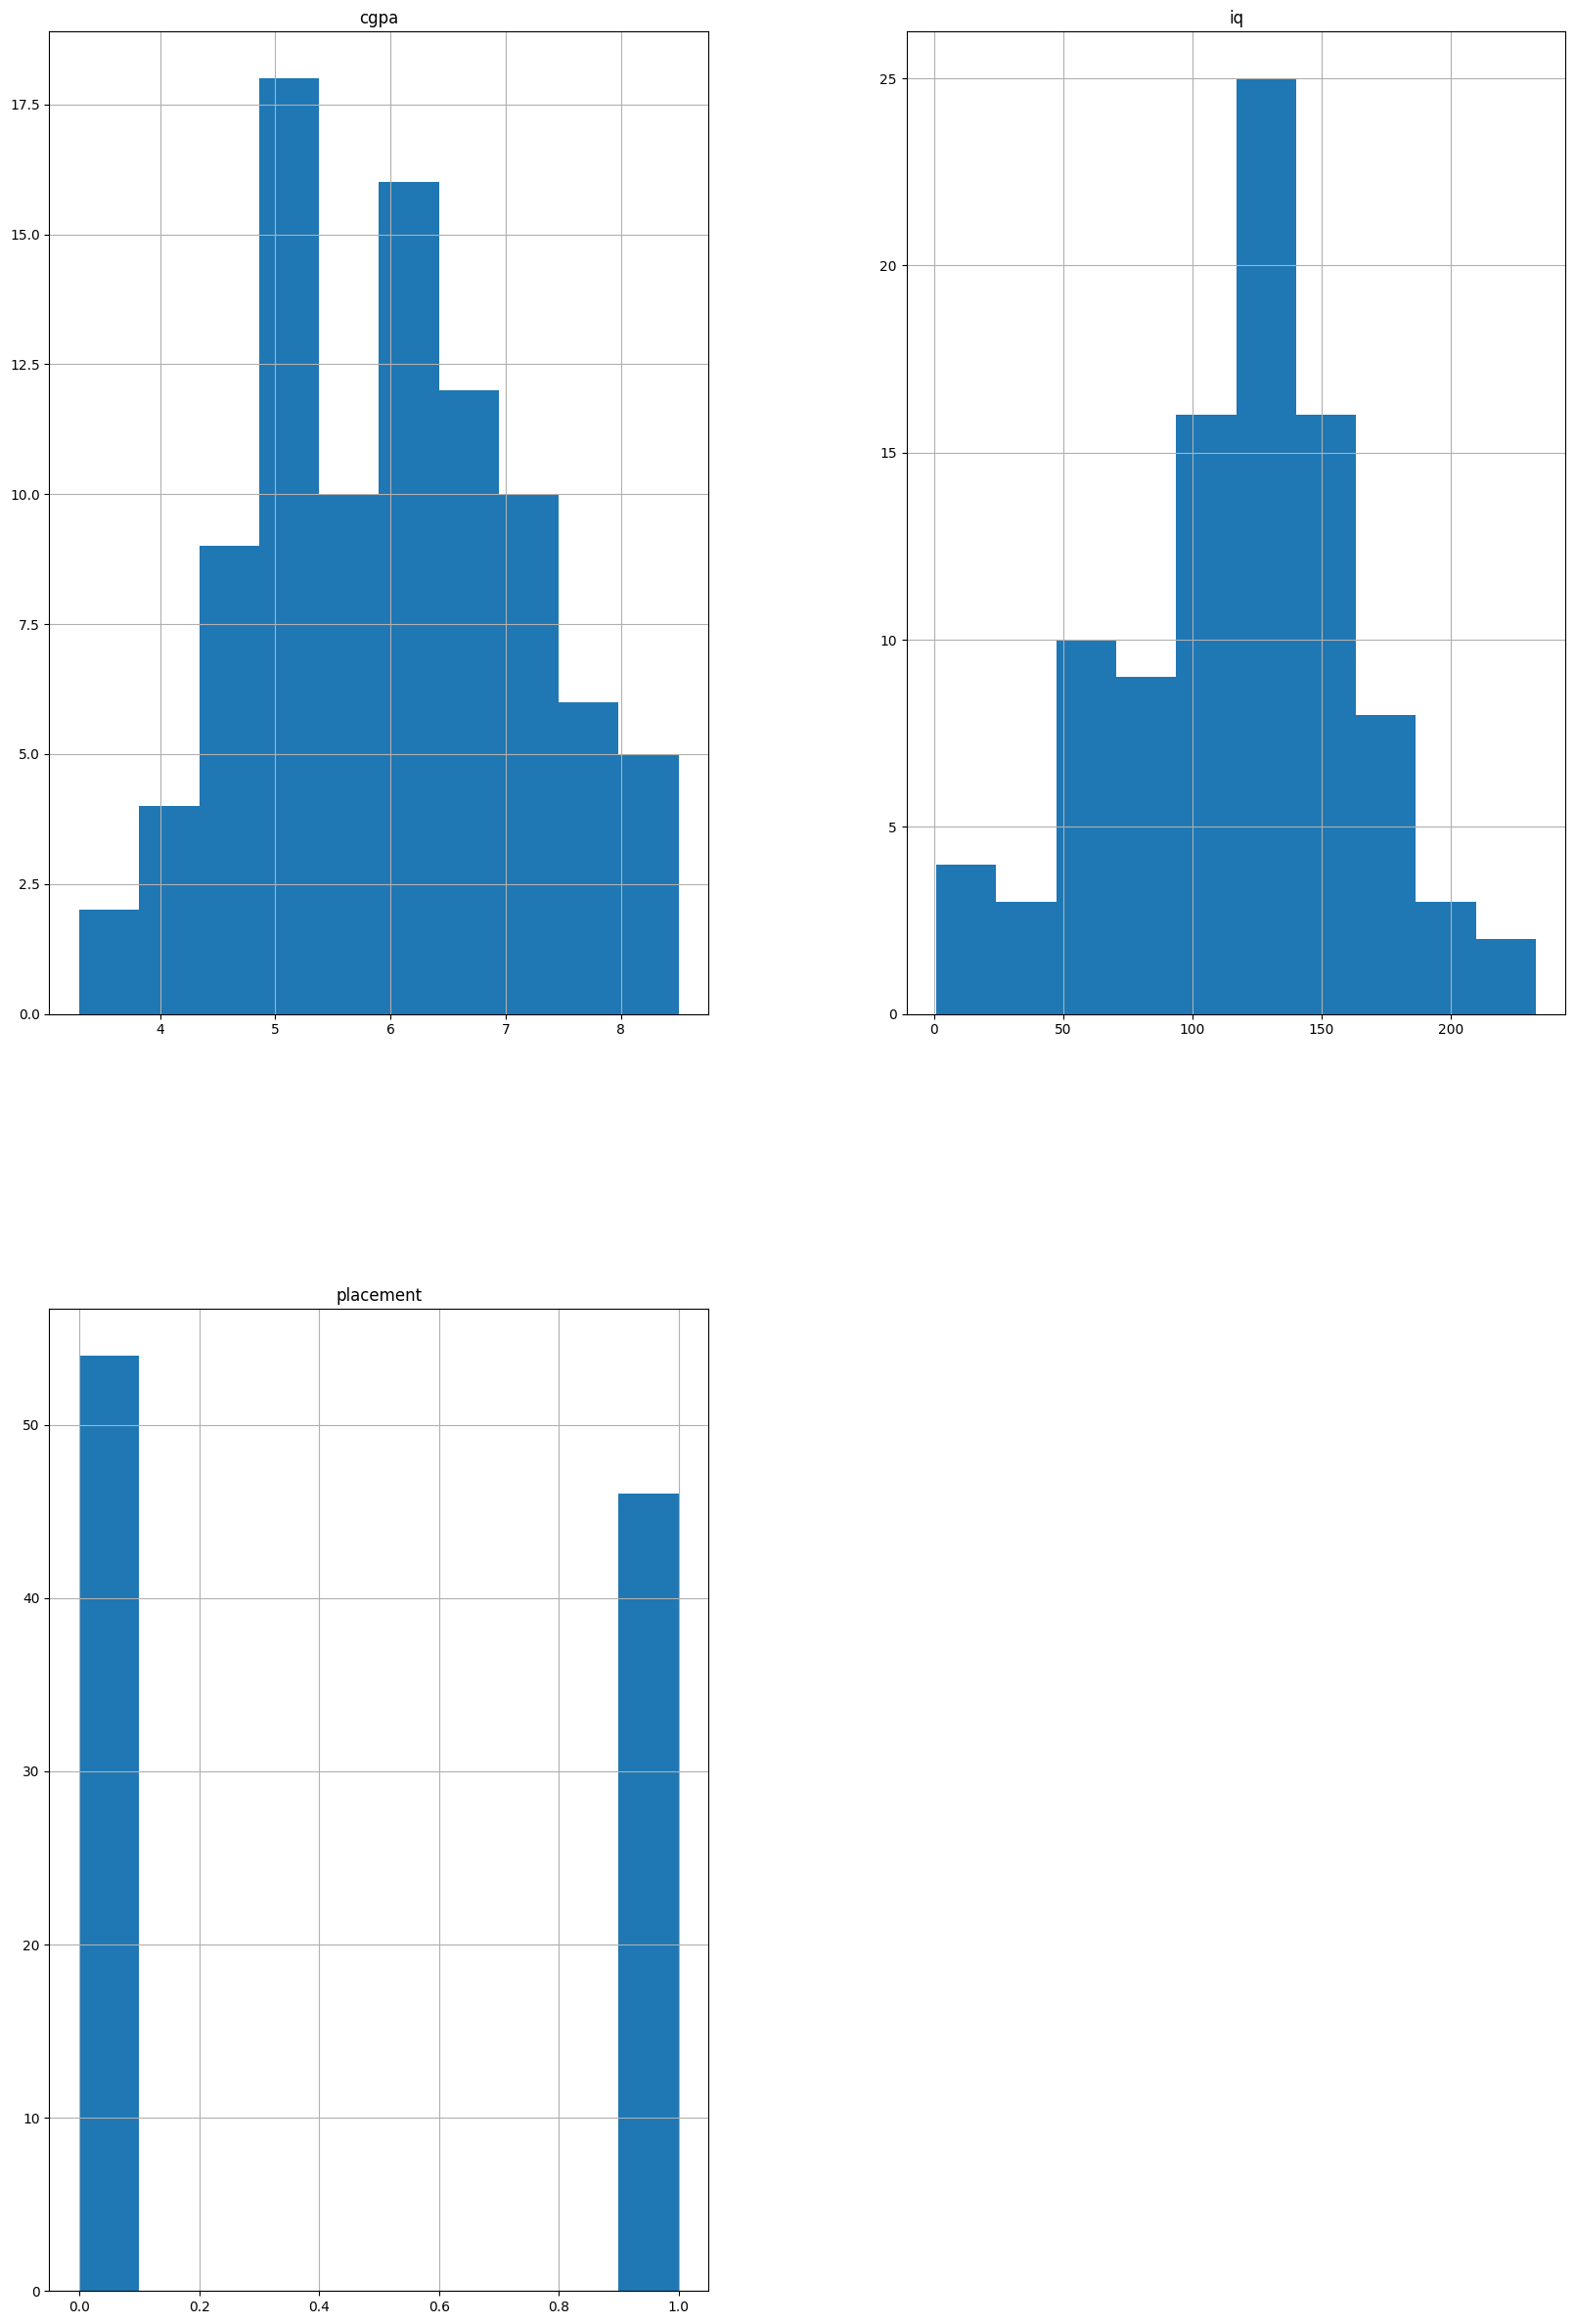

In [24]:
dataset.hist(figsize=(20,30))

<Axes: ylabel='count'>

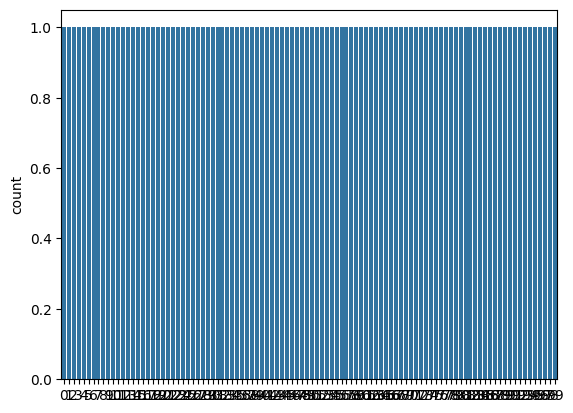

In [26]:
sns.countplot(dataset['placement'])

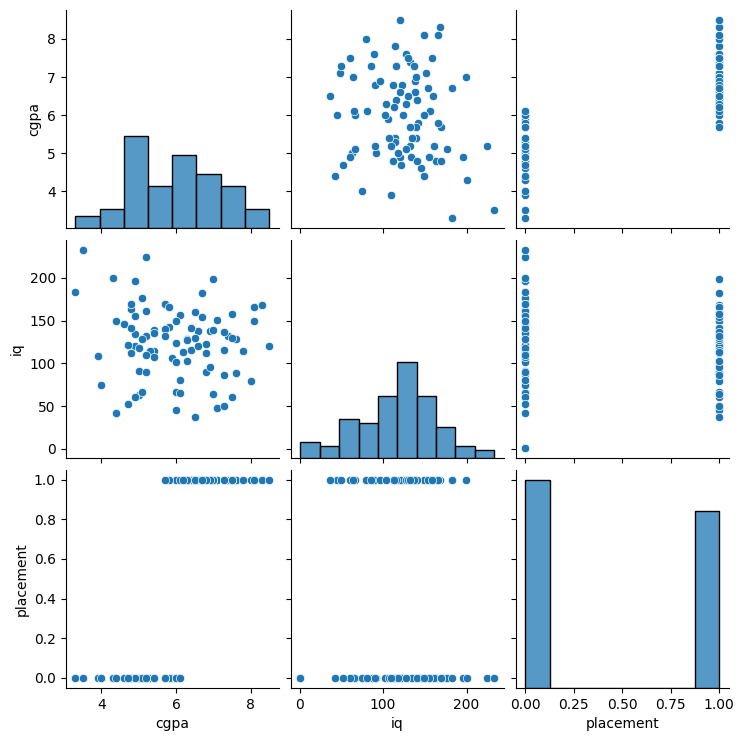

In [27]:
sns.pairplot(dataset)

               cgpa        iq  placement
cgpa       1.000000 -0.132225   0.819522
iq        -0.132225  1.000000   0.026725
placement  0.819522  0.026725   1.000000


<Axes: >

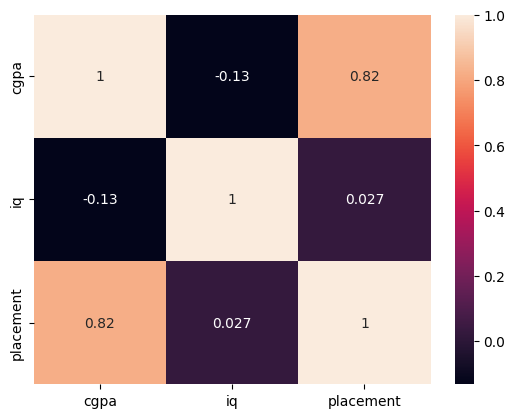

In [29]:
# Select only numeric features for correlation analysis
numeric_features = dataset.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr = numeric_features.corr()

# Print the correlation matrix
print(corr)

# Plot the heatmap
sns.heatmap(corr, annot=True)